In [1]:
import numpy as np
import matplotlib.pyplot as plt

-- Tabla generada para señal: exponential
constant wave_table : array(0 to 255) of integer := (
 0, 1039, 2062, 3069, 4060, 5036, 5996, 6942,
 7873, 8790, 9692, 10580, 11454, 12315, 13162, 13997,
 14818, 15626, 16422, 17205, 17977, 18736, 19483, 20219,
 20943, 21656, 22358, 23049, 23730, 24399, 25059, 25708,
 26346, 26975, 27595, 28204, 28804, 29395, 29976, 30549,
 31112, 31667, 32213, 32751, 33280, 33801, 34314, 34819,
 35316, 35806, 36287, 36762, 37228, 37688, 38140, 38586,
 39024, 39456, 39881, 40299, 40711, 41116, 41515, 41908,
 42295, 42676, 43051, 43420, 43783, 44140, 44492, 44839,
 45180, 45516, 45846, 46172, 46492, 46808, 47118, 47424,
 47725, 48021, 48313, 48600, 48882, 49161, 49434, 49704,
 49969, 50231, 50488, 50741, 50990, 51236, 51477, 51715,
 51949, 52180, 52407, 52630, 52850, 53066, 53280, 53489,
 53696, 53899, 54099, 54296, 54490, 54681, 54869, 55054,
 55236, 55416, 55592, 55766, 55937, 56105, 56271, 56434,
 56595, 56753, 56909, 57062, 57213, 57362, 57508, 57652,
 57794

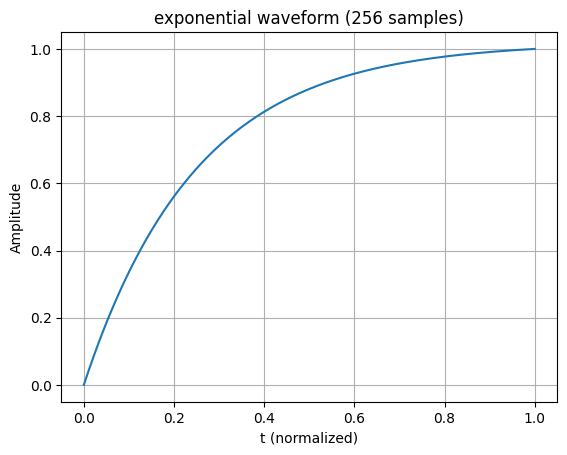

In [10]:


# ==========================================================
# CONFIGURACIÓN
# ==========================================================
N = 256                 # Número de muestras
A = 65535               # Amplitud máxima (16 bits sin signo)
wave_type = "exponential"   # Tipo de señal
normalize = True

# ==========================================================
# GENERACIÓN DE SEÑAL
# ==========================================================
t = np.linspace(0, 1, N)

if wave_type == "sine":
    y = 0.5 * (1 + np.sin(2 * np.pi * t))  # seno normalizado (0 a 1)

elif wave_type == "triangle":
    y = 2 * np.abs(2 * (t - np.floor(t + 0.5)))  # triángulo 0-2
    y = 1 - y/2

elif wave_type == "square":
    y = np.where(np.sin(2*np.pi*t) >= 0, 1, 0)

elif wave_type == "sawtooth":
    y = t  # rampa lineal 0-1

elif wave_type == "semicircle":
    y = np.sqrt(1 - (2*t - 1)**2)  # semicirc. de radio 1
    y[np.isnan(y)] = 0

elif wave_type == "exponential":
    tau = 0.25
    y = 1 - np.exp(-t/tau)

elif wave_type == "biexponential":
    dt = 25 / N
    tau1 = 0.01
    tau2 = 0.1
    y = (np.exp(-(t-dt)/tau2) - np.exp(-(t-dt)/tau1))*np.heaviside(t-dt, 1)
    y -= np.min(y)  # quitar valores negativos

else:
    raise ValueError("Tipo de señal no reconocido")

# Normalización a rango de 0 a 65535
if normalize:
    y = y / np.max(y)
y_int = np.round(A * y).astype(int)

# ==========================================================
# EXPORTACIÓN A FORMATO VHDL
# ==========================================================
print("-- Tabla generada para señal:", wave_type)
print("constant wave_table : array(0 to {0}) of integer := (".format(N-1))

for i, val in enumerate(y_int):
    end_char = "," if i < N-1 else ""
    print(f" {val}{end_char}", end="")
    if (i+1) % 8 == 0:
        print()  # salto de línea cada 8 valores

print(");")

# ==========================================================
# GRAFICAR
# ==========================================================
plt.plot(t, y)
plt.title(f"{wave_type} waveform ({N} samples)")
plt.xlabel("t (normalized)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
